In [235]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from random import randint
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.base import clone
from keras.optimizers import Adam
from sklearn.model_selection import KFold   
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping

In [236]:
#import
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [237]:
#load data
Data_clean = pd.read_excel('data_balanced.xlsx')

In [238]:
#get info
Data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41978 entries, 0 to 41977
Data columns (total 21 columns):
month                  41978 non-null int64
Age                    41978 non-null int64
Amount_netCN           41978 non-null float64
TermOfPaymentDays      41978 non-null int64
GDP by State           41978 non-null int64
Unemployment rate      41978 non-null float64
ZIP                    41978 non-null int64
DefaultStatus          41978 non-null int64
month1                 41978 non-null int64
month2                 41978 non-null int64
month3                 41978 non-null int64
month4                 41978 non-null int64
month5                 41978 non-null int64
month6                 41978 non-null int64
month7                 41978 non-null int64
month8                 41978 non-null int64
month9                 41978 non-null int64
month10                41978 non-null int64
month11                41978 non-null int64
month12                41978 non-null int64
Feq_def

In [239]:
# Check null value (Print a null value column array)
print(Data_clean.columns[Data_clean.isnull().any()])

Index([], dtype='object')


In [240]:
#Create features and target
X = Data_clean.loc[:, Data_clean.columns != "DefaultStatus"]
y = Data_clean[["DefaultStatus"]]

#Scale data
scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=.3, random_state=123)

In [241]:
#load saved model
import pickle
filename = 'logistic_model.sav'
# load the model from disk
clf_logistic = pickle.load(open(filename, 'rb'))

In [242]:
#Check model run on data
logistic_preds= clf_logistic.predict_proba(X_test)
logistic_preds

array([[0.59102329, 0.40897671],
       [0.30752571, 0.69247429],
       [0.8957281 , 0.1042719 ],
       ...,
       [0.298207  , 0.701793  ],
       [0.45327049, 0.54672951],
       [0.89674948, 0.10325052]])

In [243]:
#create logistic_prob_default for AUC coure
logistic_prob_default = logistic_preds[:,1]
logistic_prob_default

array([0.40897671, 0.69247429, 0.1042719 , ..., 0.701793  , 0.54672951,
       0.10325052])

In [244]:
# # Print the accuracy score the model
# print(clf_logistic.score(X_test, y_test))

In [245]:
# Print the AUC score the model
clf_logistic_roc=roc_auc_score(y_test, logistic_prob_default)
clf_logistic_roc

0.7982366686561174

In [246]:
#load saved model
filename = 'Decisison tree.sav'
# load the model from disk
clf_gbt = pickle.load(open(filename, 'rb'))

In [247]:
#Check model run on data
decisionTree_preds =clf_gbt.predict_proba(X_test)
decisionTree_preds

array([[0.48126495, 0.51873505],
       [0.31302088, 0.6869791 ],
       [0.930454  , 0.06954597],
       ...,
       [0.2745412 , 0.7254588 ],
       [0.5232419 , 0.47675812],
       [0.87221247, 0.12778755]], dtype=float32)

In [248]:
#create decisionTree_prob_default for AUC coure
decisionTree_prob_default = decisionTree_preds[:,1]
decisionTree_prob_default

array([0.51873505, 0.6869791 , 0.06954597, ..., 0.7254588 , 0.47675812,
       0.12778755], dtype=float32)

In [249]:
# # Print the accuracy score the model
# print(clf_gbt.score(X_test, y_test))

In [250]:
# Print the AUC score the model
clf_gbt_roc=roc_auc_score(y_test, decisionTree_prob_default)
clf_gbt_roc

0.8137217814631678

In [251]:
#create inputShape for the shape (for convenient)
inputShape=X_train.shape[1]
inputShape

20

In [252]:
#need to run this function in order to load the neural networks model
# Creates a model given an activation and learning rate
def create_model(learning_rate=0.01, activation='relu'):
	# Create an Adam optimizer with the given learning rate
	opt = Adam(lr=learning_rate)
	# Create your binary classification model
	model = Sequential()
	model.add(Dense(32, input_shape=(inputShape,), activation=activation))
	model.add(BatchNormalization())
	model.add(Dense(32, activation=activation))
	model.add(BatchNormalization())
	model.add(Dense(1, activation='sigmoid'))
	# Compile your model with your optimizer, loss, and metrics
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

In [253]:
#load saved model
filename = 'neural_model.sav'
# load the model from disk
neural_model = pickle.load(open(filename, 'rb'))

In [254]:
#Check params of model
neural_model.get_params()

{'learning_rate': 0.01,
 'epochs': 100,
 'batch_size': 32,
 'activation': 'relu',
 'build_fn': <function __main__.create_model(learning_rate=0.01, activation='relu')>}

In [255]:
# # Print the accuracy score the model
# neural_model.score(X_test, y_test)

In [256]:
#Check model run on data
neural_preds= neural_model.predict_proba(X_test)
neural_preds

array([[0.5746115 , 0.42538851],
       [0.39101917, 0.60898083],
       [0.86207545, 0.13792455],
       ...,
       [0.4205497 , 0.5794503 ],
       [0.47459245, 0.52540755],
       [0.82601666, 0.1739833 ]], dtype=float32)

In [257]:
#create neural_prob_default for AUC coure
neural_prob_default = neural_preds[:,1]
neural_prob_default

array([0.42538851, 0.60898083, 0.13792455, ..., 0.5794503 , 0.52540755,
       0.1739833 ], dtype=float32)

In [258]:
# Print the AUC score the model
neural_model_roc=roc_auc_score(y_test, neural_prob_default)
neural_model_roc

0.8074920917001818

In [259]:
#Create ensemble model
#create a dictionary of our models
estimators=[('lr', clf_logistic), ('dt', clf_gbt)   , ('neu', neural_model)]
#create our voting classifier, inputting our models, weight models by ROC score
ensemble = VotingClassifier(estimators, voting='soft',  weights= [clf_logistic_roc, clf_gbt_roc, neural_model_roc])

In [260]:
#fit model to training data
ensemble.fit(X_train, y_train)

Epoch 1/100
29384/29384 [==============================] - 2s 53us/step - loss: 0.5657 - accuracy: 0.7110
Epoch 2/100
29384/29384 [==============================] - 1s 43us/step - loss: 0.5531 - accuracy: 0.7190
Epoch 3/100
29384/29384 [==============================] - 1s 44us/step - loss: 0.5490 - accuracy: 0.7200
Epoch 4/100
29384/29384 [==============================] - 1s 43us/step - loss: 0.5447 - accuracy: 0.7238
Epoch 5/100
29384/29384 [==============================] - 1s 45us/step - loss: 0.5435 - accuracy: 0.7241
Epoch 6/100
29384/29384 [==============================] - 1s 43us/step - loss: 0.5452 - accuracy: 0.7220
Epoch 7/100
29384/29384 [==============================] - 1s 44us/step - loss: 0.5425 - accuracy: 0.7225
Epoch 8/100
29384/29384 [==============================] - 1s 43us/step - loss: 0.5421 - accuracy: 0.7243
Epoch 9/100
29384/29384 [==============================] - 1s 44us/step - loss: 0.5413 - accuracy: 0.7251
Epoch 10/100
29384/29384 [====================

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=163789.3706954068,
                                                 class_weight=None, dual=False,
                                                 fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              XGBClassifier(base_score=0.5, booster=None,
                                            colsample_byleve...
                                            objective

In [261]:
# # Print the accuracy score the model
# ensemble.score(X_test, y_test)

In [262]:
#Check model run on data
ensemble_preds= ensemble.predict_proba(X_test)
ensemble_preds

array([[0.5457163 , 0.45428371],
       [0.32213328, 0.67786672],
       [0.91940942, 0.08059058],
       ...,
       [0.30798681, 0.69201319],
       [0.4698017 , 0.5301983 ],
       [0.85698135, 0.14301866]])

In [263]:
#create ensemble_prob_default for AUC coure
ensemble_prob_default = ensemble_preds[:,1]
ensemble_prob_default

array([0.45428371, 0.67786672, 0.08059058, ..., 0.69201319, 0.5301983 ,
       0.14301866])

In [264]:
# Print the AUC score the model
ensemble_roc=roc_auc_score(y_test, ensemble_prob_default)
ensemble_roc

0.8116049600206678

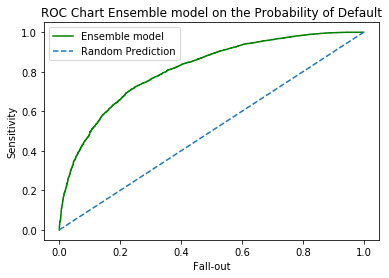

In [265]:
# Plot the ROC curve of the probabilities of default
fallout, sensitivity, thresholds = roc_curve(y_test, ensemble_prob_default)  #prob_default is prob
plt.plot(fallout, sensitivity, color = 'green', label='%s' % 'Ensemble model')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart Ensemble model on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [266]:
# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, ensemble_prob_default)
print(auc)

0.8116049600206678


In [267]:
# Predict with a model
ensemble_preds = ensemble.predict_proba(X_test)   #gbt_preds is proba

# Create dataframes of predictions and true labels
preds_df = pd.DataFrame(ensemble_preds[:,1][:], columns = ['prob_default'])
true_df = y_test

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df ], axis = 1))

DefaultStatus  prob_default
0                  1      0.454284
1                  1      0.677867
2                  0      0.080591
3                  0      0.212419
4                  0      0.589691
...              ...           ...
12589              1      0.432918
12590              0      0.847319
12591              1      0.692013
12592              1      0.530198
12593              1      0.143019

[12594 rows x 2 columns]


In [268]:
# Predict the labels for default status
ensemble_preds_df = pd.DataFrame(ensemble_preds[:,1], columns = ['prob_default'])

# Reassign default status based on the threshold
ensemble_preds_df['DefaultStatus'] = ensemble_preds_df['prob_default'].apply(lambda x: 1 if x > 0.25 else 0)  # threshold 0.25

In [269]:
# Check the values created by the predict method
print(ensemble_preds_df['DefaultStatus'].value_counts())

1    9865
0    2729
Name: DefaultStatus, dtype: int64


In [270]:
# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, ensemble_preds_df['DefaultStatus'], target_names=target_names))

precision    recall  f1-score   support

 Non-Default       0.87      0.38      0.53      6207
     Default       0.61      0.94      0.74      6387

    accuracy                           0.67     12594
   macro avg       0.74      0.66      0.64     12594
weighted avg       0.74      0.67      0.64     12594



In [271]:
#Print confusion matrix
print(confusion_matrix(y_test,ensemble_preds_df['DefaultStatus']))

[[2364 3843]
 [ 365 6022]]


In [272]:
#Print AUC score for the threshold
print(roc_auc_score(y_test, ensemble_preds_df['DefaultStatus']))

0.6618564942397873


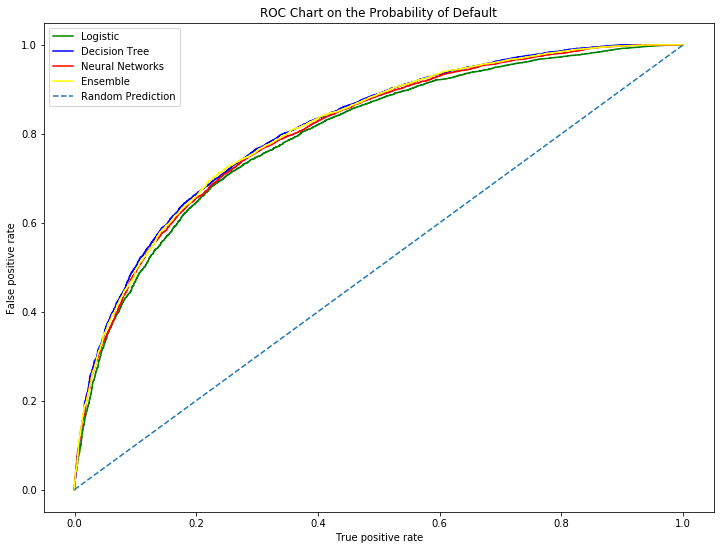

In [273]:
# ROC chart components
plt.figure(figsize=(12,9))   #4,3
logistic_fallout, logistic_sensitivity, logistic_thresholds = roc_curve(y_test, logistic_prob_default)  #prob_default is prob
decisionTree_fallout, decisionTree_sensitivity, decisionTree_thresholds = roc_curve(y_test, decisionTree_prob_default) 
neural_fallout, neural_sensitivity, neural_thresholds = roc_curve(y_test, neural_prob_default)
ensemble_fallout, ensemble_sensitivity, ensemble_thresholds = roc_curve(y_test, ensemble_prob_default)


plt.plot(logistic_fallout, logistic_sensitivity, color = 'green', label='%s' % 'Logistic')
plt.plot(decisionTree_fallout, decisionTree_sensitivity, color = 'blue', label='%s' % 'Decision Tree')
plt.plot(neural_fallout, neural_sensitivity, color = 'red', label='%s' % 'Neural Networks')
plt.plot(ensemble_fallout, ensemble_sensitivity, color = 'yellow', label='%s' % 'Ensemble')
plt.title("ROC Chart on the Probability of Default")
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.xlabel('True positive rate')   #'Fall-out'
plt.ylabel('False positive rate')  #'Sensitivity'
plt.legend()
plt.show()

In [274]:
# Compute the AUC and store it in a variable
logistic_auc = roc_auc_score(y_test, logistic_prob_default)
decisionTree_auc = roc_auc_score(y_test, decisionTree_prob_default)
neural_auc = roc_auc_score(y_test, neural_prob_default)
ensemble_auc = roc_auc_score(y_test, ensemble_prob_default)

print('AUC logistic', logistic_auc)
print('AUC decisionTree', decisionTree_auc)
print('AUC Neural Networks', neural_auc)
print('AUC Ensemble', ensemble_auc)

AUC logistic 0.7982366686561174
AUC decisionTree 0.8137217814631678
AUC Neural Networks 0.8074920917001818
AUC Ensemble 0.8116049600206678


In [275]:
# Print the accuracy score the model
print('accuracy score Logistic', clf_logistic.score(X_test, y_test))
print('accuracy score DecisionTree', clf_gbt.score(X_test, y_test))
print('accuracy score Neural Networks', neural_model.score(X_test, y_test))
print('accuracy score Ensemble', ensemble.score(X_test, y_test) )

accuracy score Logistic 0.7268540574876926
accuracy score DecisionTree 0.7338415118310306
12594/12594 [==============================] - 0s 26us/step
accuracy score Neural Networks 0.729553759098053
accuracy score Ensemble 0.7365412101000477
